# 2014 Scraped Foreclosure Case Data

In [1]:
from pandas import DataFrame, read_csv, to_datetime

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
%matplotlib inline

In [2]:
df = read_csv("2014_clean.csv")

In [3]:
df["Filing Date"] = to_datetime(df["Filing Date"])

df.head()

,Filing Date,Case Number,Case Type,Title,Plaintiff,Defendant,Address,Zip Code,Partial Cost
0,2013-03-18,24O14000813,Mortgage,Lloyd D Lurie vs SADA LLC,Lloyd D Lurie,SADA LLC,4300 Erdman Ave,21213.0,"$194,892.43"
1,2013-07-24,24O14002232,Mortgage,John E Driscoll III vs Estate Of Earl Jerry Sye,John E Driscoll III,Estate Of Earl Jerry Sye,4033 Boarman Ave,21215.0,NaN
2,2014-01-02,24O14000001,Mortgage,James E Clarke vs Tiffany R Harris,James E Clarke,Tiffany R Harris,4603 Valley View Ave,21206.0,"$175,648.50"
3,2014-01-02,24O14000002,Mortgage,James W Holderness vs Intercoastal Investment ...,James W Holderness,Intercoastal Investment Trust Ltd,4718 Edmondson Ave,21229.0,"$166,358.48"
4,2014-01-02,24O14000003,Mortgage,James W Holderness vs Intercoastal Investment ...,James W Holderness,Intercoastal Investment Trust Ltd,333 N Stricker St,21223.0,"$23,189.54"


In [4]:
print "Count of features:\n"
print df.count()

Count of features:

Filing Date     4017
Case Number     4017
Case Type       4017
Title           4017
Plaintiff       4015
Defendant       4015
Address         4017
Zip Code        3513
Partial Cost    3539
dtype: int64


In [5]:
print "NULL count:\n"
print df.isnull().sum()

NULL count:

Filing Date       0
Case Number       0
Case Type         0
Title             0
Plaintiff         2
Defendant         2
Address           0
Zip Code        504
Partial Cost    478
dtype: int64


In [6]:
new_df = DataFrame(df.groupby(df["Filing Date"].dt.week)['Case Number'].count())
new_df.columns = ["Case Count"]
new_df["Week"] = new_df.index

In [7]:
print "Distribution of cases:\n"
print new_df["Case Count"].describe()

Distribution of cases:

count     52.000000
mean      77.250000
std       14.988721
min       41.000000
25%       68.750000
50%       78.500000
75%       84.250000
max      108.000000
Name: Case Count, dtype: float64


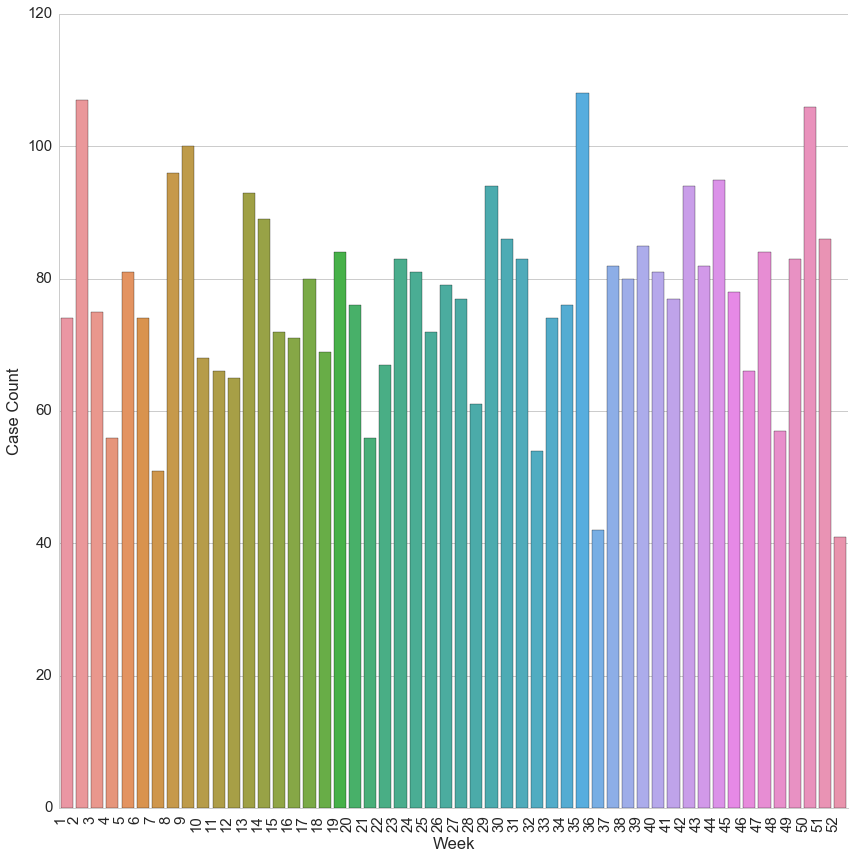

In [8]:
p = sns.factorplot(x="Week", y='Case Count', kind='bar', data=new_df, size=12)
p.set_xticklabels(rotation=90, horizontalalignment='right')